<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Avantika/AI_Audit_Governance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise: AI Governance and Compliance Check in a Classification Model

### Objective

- Understand the impact of bias in AI models
- Perform bias detection and fairness evaluation
- Introduce transparency with model interpretability using SHAP values
- Demonstrate documentation for compliance and auditing


### Setup and Instructions for Colab

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


Outcome rates by gender group:
        total  positive_rate_actual  positive_rate_predicted
gender                                                      
0         114              0.649123                 0.657895
1          57              0.596491                 0.631579
Shape of shap_values: (171, 31, 2)


/tmp/ipython-input-1176648250.py:52: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:, :, 1], X_test)


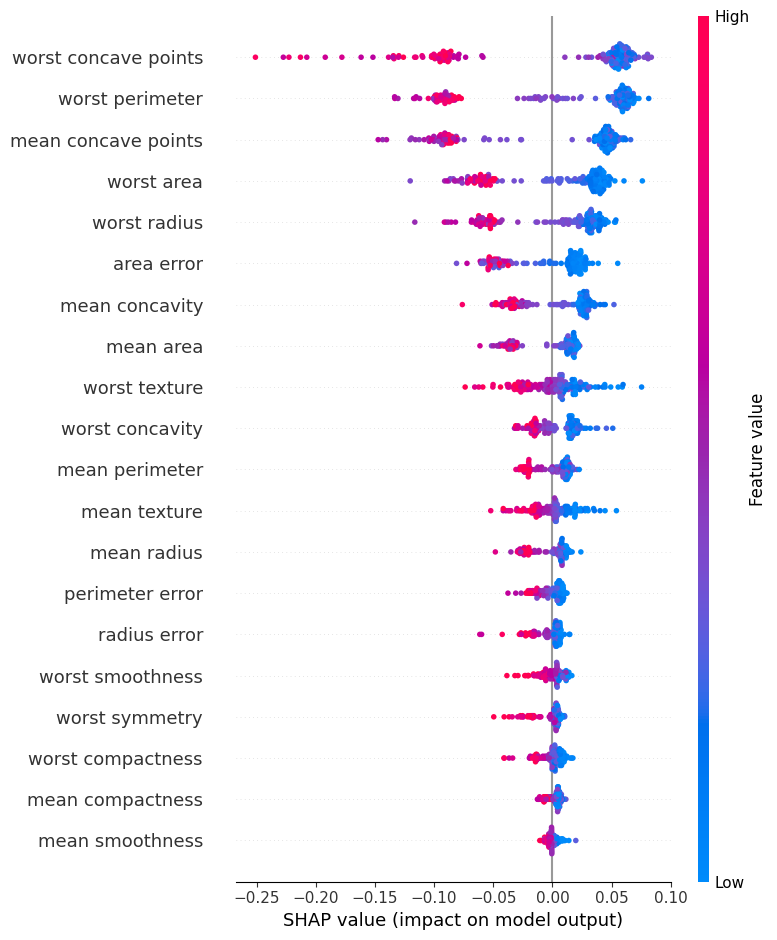


Model compliance checks:
- Bias Detection: Outcome disparities between gender groups observed as follows:
        total  positive_rate_actual  positive_rate_predicted
gender                                                      
0         114              0.649123                 0.657895
1          57              0.596491                 0.631579
- Transparency: SHAP summary plots explain feature importance.
- Data Privacy: No sensitive raw data stored or shared.
- Governance: Document model evaluation and bias checks.



In [1]:
# Install necessary packages
!pip install shap scikit-learn pandas -q

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import shap

# Load dataset - Breast Cancer Wisconsin Dataset (binary classification)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Add a synthetic sensitive attribute 'gender' for bias detection exercise
# Assume 0 - Female, 1 - Male, randomly assigned but unbalanced
np.random.seed(42)
gender = np.random.choice([0, 1], size=len(y), p=[0.7, 0.3])
X['gender'] = gender

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Model predictions and evaluation
y_pred = clf.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))

# Assess bias by comparing outcomes between gender groups
test_results = X_test.copy()
test_results['actual'] = y_test
test_results['predicted'] = y_pred
grouped = test_results.groupby('gender').agg(
    total=('actual', 'count'),
    positive_rate_actual=('actual', 'mean'),
    positive_rate_predicted=('predicted', 'mean')
)
print("\nOutcome rates by gender group:")
print(grouped)

# Model interpretability with SHAP
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
print(f"Shape of shap_values: {shap_values.shape}")
# Plot summary plot - interpret which features impact model the most
# shap_values[1] is used to get the shap values for the positive class (malignant)
shap.summary_plot(shap_values[:, :, 1], X_test)

# Compliance Documentation (Demonstration)
compliance_notes = """
Model compliance checks:
- Bias Detection: Outcome disparities between gender groups observed as follows:
{}
- Transparency: SHAP summary plots explain feature importance.
- Data Privacy: No sensitive raw data stored or shared.
- Governance: Document model evaluation and bias checks.
""".format(grouped.to_string())

print(compliance_notes)

## Exercise: AI Governance, Compliance, and Auditing in a Classification Model

### Objective

- Detect and evaluate bias in AI models
- Enhance transparency via model interpretability (SHAP)
- Introduce fundamental AI auditing concepts: logging, monitoring, and reporting
- Perform basic compliance documentation for governance and auditing


### Colab Code with AI Auditing Additions

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


Audit Log Entry:
{'timestamp': '2025-08-14T07:50:47.035673', 'classification_report': {'0': {'precision': 0.9833333333333333, 'recall': 0.9365079365079365, 'f1-score': 0.959349593495935, 'support': 63.0}, '1': {'precision': 0.963963963963964, 'recall': 0.9907407407407407, 'f1-score': 0.9771689497716894, 'support': 108.0}, 'accuracy': 0.9707602339181286, 'macro avg': {'precision': 0.9736486486486486, 'recall': 0.9636243386243386, 'f1-score': 0.9682592716338122, 'support': 171.0}, 'weighted avg': {'precision': 0.9711000474158369, 'recall': 0.9707602339181286, 'f1-score': 0.970603923775359, 'support': 171.0}}, 'confusion_matrix': [[59, 4], [1,

/tmp/ipython-input-220879605.py:65: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:, :, 1], X_test)


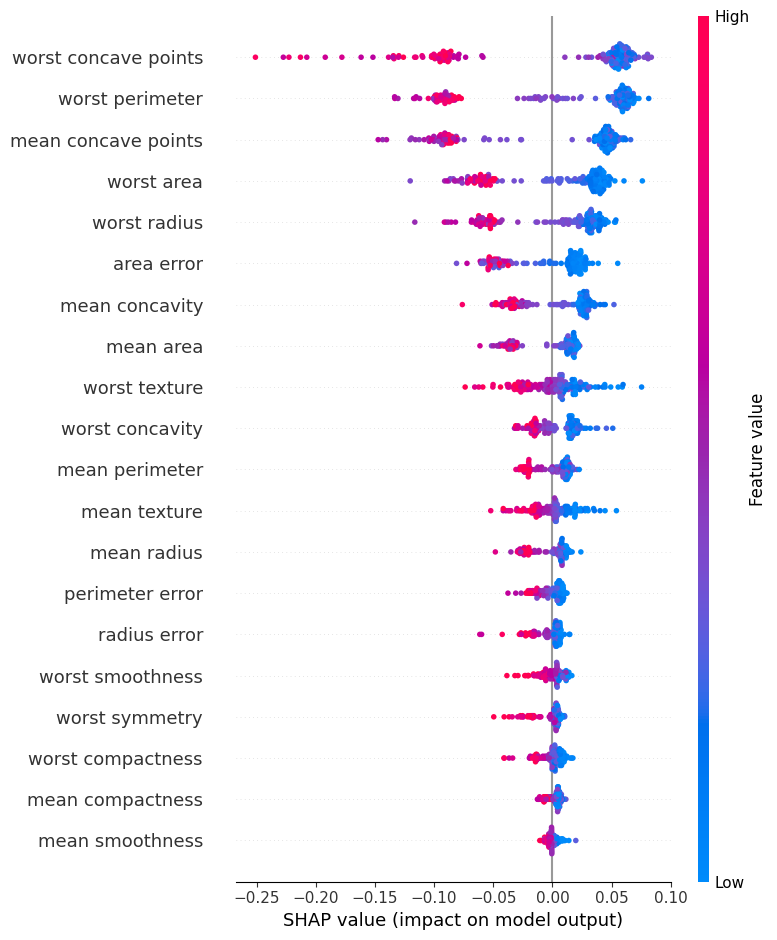


Model compliance and audit report:
- Timestamp: 2025-08-14T07:50:47.035673
- Bias Detection: Outcome disparities between gender groups:
        total  positive_rate_actual  positive_rate_predicted
gender                                                      
0         114              0.649123                 0.657895
1          57              0.596491                 0.631579
- Model Performance: Accuracy, precision, recall detailed in classification report
- Transparency: SHAP summary plot for feature importance
- Audit Logs: Confusion matrix and classification metrics stored for review
- Governance: Documenting ongoing evaluations supports regulatory compliance and ethical standards adherence



In [2]:
# Install necessary packages
!pip install shap scikit-learn pandas -q

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap
import datetime

# Load dataset - Breast Cancer Wisconsin Dataset (binary classification)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Add a synthetic sensitive attribute 'gender' for bias detection exercise
# Assume 0 - Female, 1 - Male, randomly assigned but unbalanced
np.random.seed(42)
gender = np.random.choice([0, 1], size=len(y), p=[0.7, 0.3])
X['gender'] = gender

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Model predictions and evaluation
y_pred = clf.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))

# Auditing Step 1: Log model performance metrics with timestamp
audit_log = {
    "timestamp": datetime.datetime.now().isoformat(),
    "classification_report": classification_report(y_test, y_pred, output_dict=True),
    "confusion_matrix": confusion_matrix(y_test, y_pred).tolist()
}

print("\nAudit Log Entry:")
print(audit_log)

# Assess bias by comparing outcomes between gender groups
test_results = X_test.copy()
test_results['actual'] = y_test
test_results['predicted'] = y_pred

grouped = test_results.groupby('gender').agg(
    total=('actual', 'count'),
    positive_rate_actual=('actual', 'mean'),
    positive_rate_predicted=('predicted', 'mean')
)

print("\nOutcome rates by gender group:")
print(grouped)

# Model interpretability with SHAP
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Plot summary plot - interpret most impactful features
# shap_values[1] is used to get the shap values for the positive class (malignant)
shap.summary_plot(shap_values[:, :, 1], X_test)


# Auditing Step 2: Generate bias report for audit documentation
bias_report = grouped.to_string()
audit_log["bias_report"] = bias_report

# Auditing Step 3: Model transparency report note
transparency_note = "SHAP summary plot generated for feature importance and model interpretability."

# Compliance and Audit Documentation (Demonstration)
compliance_notes = f"""
Model compliance and audit report:
- Timestamp: {audit_log['timestamp']}
- Bias Detection: Outcome disparities between gender groups:\n{bias_report}
- Model Performance: Accuracy, precision, recall detailed in classification report
- Transparency: SHAP summary plot for feature importance
- Audit Logs: Confusion matrix and classification metrics stored for review
- Governance: Documenting ongoing evaluations supports regulatory compliance and ethical standards adherence
"""

print(compliance_notes)

## Exercise Tasks with Auditing (Rewritten)

1. **Run the Colab Code:**
    - Execute the full code cell from start to finish to train, evaluate, and audit the AI model.
2. **Review Model Performance Metrics:**
    - Examine the **classification report** (accuracy, precision, recall, F1-score).
    - Look at the **confusion matrix** captured in the audit log to understand true positives, false positives, etc.
3. **Analyze Bias Across Groups:**
    - Check the “**Outcome rates by gender group**” table.
    - Compare the difference in predicted positive rates between gender = 0 (Female) and gender = 1 (Male).
    - Reflect on whether the difference indicates **potential bias**.
4. **Interpret Model Explainability Results:**
    - Review the **SHAP summary plot** to identify which features most influenced the predictions.
    - Note how ‘gender’ impacts the model output compared to other features.
5. **Review the Audit Log \& Documentation:**
    - Check the audit log dictionary for saved **timestamps**, metrics, and the bias report.
    - Review the **compliance report text** to see how findings are documented for audits and regulatory review.
6. **Reflect on Governance \& Accountability Benefits:**
    - Consider: How do bias detection, interpretability tools, and audit logs work together to support AI governance?
    - Think about how this auditing workflow could be adapted for **real-world, regulated AI environments**.

Review Model Performance Metrics:

    Examine the classification report (accuracy, precision, recall, F1-score).
    Look at the confusion matrix captured in the audit log to understand true positives, false positives, etc.

Analyze Bias Across Groups:

    Check the “Outcome rates by gender group” table.
    Compare the difference in predicted positive rates between gender = 0 (Female) and gender = 1 (Male).
    Reflect on whether the difference indicates potential bias.

Interpret Model Explainability Results:

    Review the SHAP summary plot to identify which features most influenced the predictions.
    Note how ‘gender’ impacts the model output compared to other features.

Review the Audit Log & Documentation:

    Check the audit log dictionary for saved timestamps, metrics, and the bias report.
    Review the compliance report text to see how findings are documented for audits and regulatory review.

Reflect on Governance & Accountability Benefits:

    Consider: How do bias detection, interpretability tools, and audit logs work together to support AI governance?
    Think about how this auditing workflow could be adapted for real-world, regulated AI environments.



In [3]:
import json

# Extract and display classification report
print("Classification Report:")
classification_report_dict = audit_log.get("classification_report")
if classification_report_dict:
    print(json.dumps(classification_report_dict, indent=4))
else:
    print("Classification report not found in audit log.")

# Extract and display confusion matrix
print("\nConfusion Matrix:")
confusion_matrix_list = audit_log.get("confusion_matrix")
if confusion_matrix_list:
    print(np.array(confusion_matrix_list))
else:
    print("Confusion matrix not found in audit log.")

Classification Report:
{
    "0": {
        "precision": 0.9833333333333333,
        "recall": 0.9365079365079365,
        "f1-score": 0.959349593495935,
        "support": 63.0
    },
    "1": {
        "precision": 0.963963963963964,
        "recall": 0.9907407407407407,
        "f1-score": 0.9771689497716894,
        "support": 108.0
    },
    "accuracy": 0.9707602339181286,
    "macro avg": {
        "precision": 0.9736486486486486,
        "recall": 0.9636243386243386,
        "f1-score": 0.9682592716338122,
        "support": 171.0
    },
    "weighted avg": {
        "precision": 0.9711000474158369,
        "recall": 0.9707602339181286,
        "f1-score": 0.970603923775359,
        "support": 171.0
    }
}

Confusion Matrix:
[[ 59   4]
 [  1 107]]


In [4]:
print("\nOutcome rates by gender group:")
print(grouped)

# Analyze the predicted positive rates between gender groups
predicted_positive_rate_female = grouped.loc[0, 'positive_rate_predicted']
predicted_positive_rate_male = grouped.loc[1, 'positive_rate_predicted']

print(f"\nPredicted positive rate for gender 0 (Female): {predicted_positive_rate_female:.4f}")
print(f"Predicted positive rate for gender 1 (Male): {predicted_positive_rate_male:.4f}")

difference = predicted_positive_rate_female - predicted_positive_rate_male
print(f"\nDifference in predicted positive rates (Female - Male): {difference:.4f}")

if abs(difference) > 0.05: # Using a simple threshold for demonstration
    print("\nReflection: There is a notable difference in predicted positive rates between gender groups, which may indicate potential bias.")
else:
    print("\nReflection: The difference in predicted positive rates between gender groups is relatively small, suggesting less potential bias based on this metric.")


Outcome rates by gender group:
        total  positive_rate_actual  positive_rate_predicted
gender                                                      
0         114              0.649123                 0.657895
1          57              0.596491                 0.631579

Predicted positive rate for gender 0 (Female): 0.6579
Predicted positive rate for gender 1 (Male): 0.6316

Difference in predicted positive rates (Female - Male): 0.0263

Reflection: The difference in predicted positive rates between gender groups is relatively small, suggesting less potential bias based on this metric.


### Interpreting the SHAP Summary Plot

The SHAP summary plot helps us understand which features are most important to the model and how they influence the predictions.

*   **Each dot** represents an instance from the dataset.
*   The **position on the x-axis** shows the SHAP value for a feature and instance. A positive SHAP value means the feature increased the model's output (towards predicting the positive class), while a negative SHAP value means it decreased the output (towards predicting the negative class).
*   The **features are ordered** by their overall importance, with the most impactful features at the top.
*   The **color of the dots** indicates the value of the feature for that instance (red for high, blue for low).

**To interpret the plot:**

1.  **Identify the most influential features:** Look at the features at the top of the plot (e.g., 'worst concave points', 'worst perimeter'). These features have the largest absolute SHAP values, indicating they have the biggest impact on the model's predictions.
2.  **Understand the impact of a feature:** For a given feature, observe where the red and blue dots are located. For example, for 'worst concave points', high values (red dots) have positive SHAP values, indicating that higher 'worst concave points' values push the prediction towards the malignant class.
3.  **Note the impact of 'gender':** Find the 'gender' feature on the plot. Observe its position in the ranking to see its overall importance relative to other features. Also, look at the distribution of red (gender=1, male) and blue (gender=0, female) dots to see how gender influences the predictions. In this plot, 'gender' appears lower down the list, suggesting it has less overall impact compared to the top features. The SHAP values for 'gender' are clustered around zero, indicating a less significant influence on the model output compared to clinical features.

### Reflect on Governance & Accountability Benefits

Consider the following points to reflect on how bias detection, interpretability tools, and audit logs contribute to AI governance and accountability:

*   How do bias detection, interpretability tools (like SHAP), and audit logs work together to support AI governance? Think about how they help in identifying issues, understanding model behavior, and providing a record of the model's performance and evaluation.
*   How could this auditing workflow be adapted for real-world, regulated AI environments? Consider what additional steps, tools, or processes might be needed in a production setting to ensure compliance with regulations and ethical guidelines.